In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr

stock = fdr.DataReader('AMZN', '2017')

In [4]:
stock.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2021-05-07', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20'],
              dtype='datetime64[ns]', name='Date', length=1103, freq=None)

In [5]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

stock.head()

,Close,Open,High,Low,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2017-01-03,753.67,757.92,758.76,747.70,3520000.0,0.0051,2017,1,3
2017-01-04,757.18,758.39,759.68,754.20,2510000.0,0.0047,2017,1,4
2017-01-05,780.45,761.55,782.40,760.26,5830000.0,0.0307,2017,1,5
2017-01-06,795.99,782.36,799.44,778.48,5990000.0,0.0199,2017,1,6
2017-01-09,796.92,798.00,801.77,791.77,3450000.0,0.0012,2017,1,9


Text(0, 0.5, 'price')

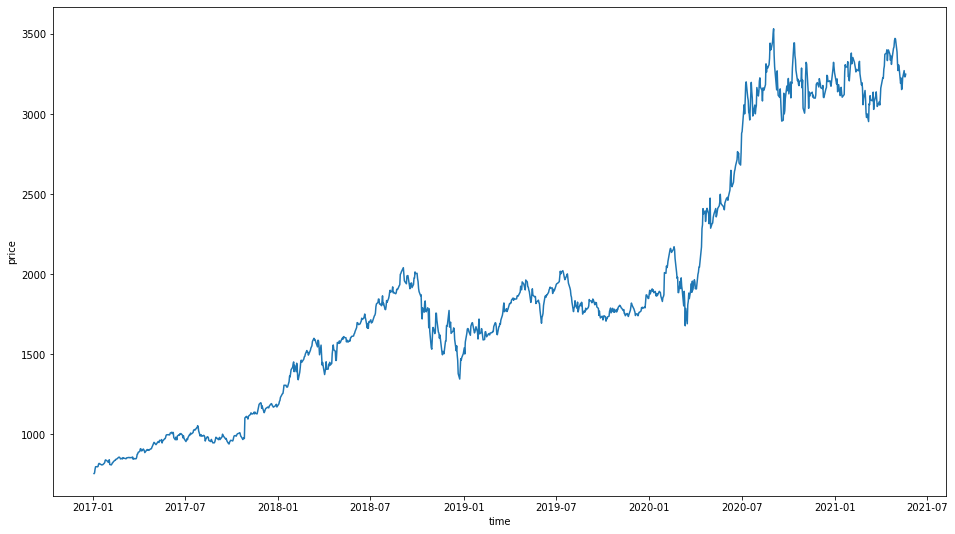

In [6]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

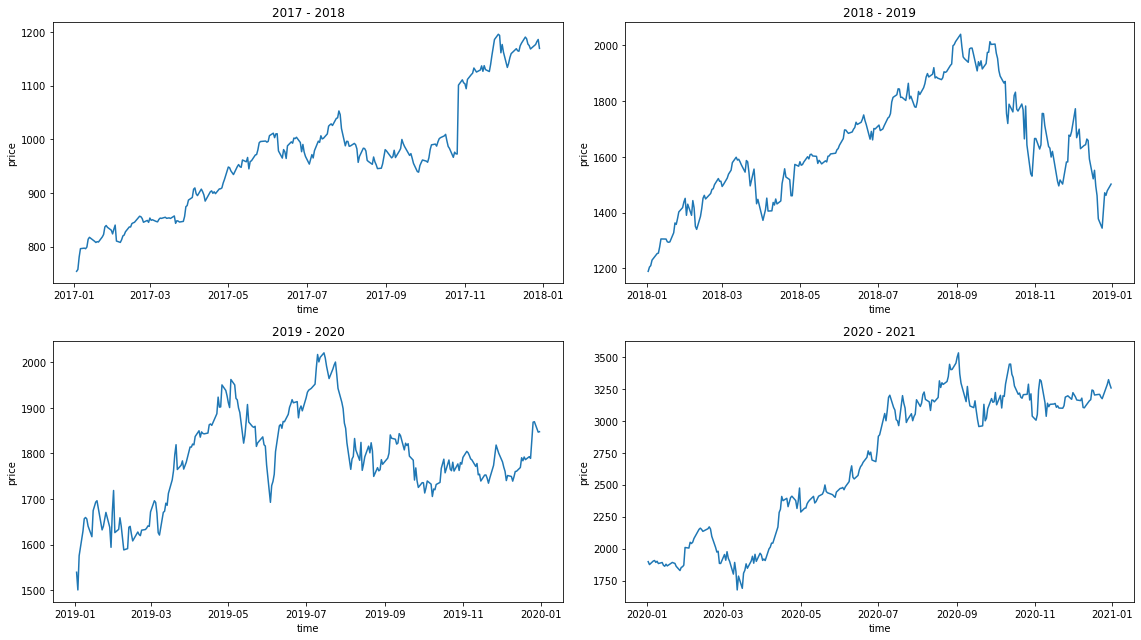

In [7]:
time_steps = [['2017', '2018'], 
              ['2018', '2019'], 
              ['2019', '2020'], 
              ['2020', '2021']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)

for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y = df['Close'], x = df.index, ax = ax)
    ax.set_title(f'{time_steps[i][0]} - {time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
    
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
df = pd.DataFrame(scaled, columns=scale_cols)
df.head()

,Open,High,Low,Close,Volume
0,0.000000,0.000000,0.000000,0.000000,0.168189
1,0.000169,0.000329,0.002373,0.001264,0.103811
2,0.001302,0.008457,0.004586,0.009641,0.315429
3,0.008763,0.014553,0.011238,0.015235,0.325628
4,0.014370,0.015387,0.016090,0.015570,0.163727


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.3, random_state=0, shuffle=False)
x_train.shape, x_test.shape

((772, 4), (331, 4))

In [10]:
learning_rate = 0.01
training_cnt = 20
batch_size = 200
input_size = x_train.shape[1]

time_step = 1

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [12]:
x_train = x_train.reshape(x_train.shape[0], 1, input_size)
x_test = x_test.reshape(x_test.shape[0], 1, input_size)

x_train.shape, x_test.shape

((772, 1, 4), (331, 1, 4))

In [13]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM
import matplotlib.pyplot as plt


model = Sequential([
    LSTM(512,input_shape=(1,input_size)),
    Dropout(0.2),
    Dense(1,activation='relu') 
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(loss='mse',optimizer='rmsprop',metrics=['mae', 'mape'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 512)               1058816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 1,059,329
Trainable params: 1,059,329
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=training_cnt, batch_size=batch_size)
#val_mse, val_mae, val_mape = model.evaluate(test_x, test_y, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 772 samples, validate on 331 samples
Epoch 1/20
772/772 [==============================] - 2s 3ms/sample - loss: 0.0551 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 2363.6926 - val_loss: 0.2493 - val_mean_absolute_error: 0.4790 - val_mean_absolute_percentage_error: 61.2104
Epoch 2/20
772/772 [==============================] - 0s 204us/sample - loss: 0.0141 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 174148.0000 - val_loss: 0.1281 - val_mean_absolute_error: 0.3376 - val_mean_absolute_percentage_error: 42.2975
Epoch 3/20
772/772 [==============================] - 0s 194us/sample - loss: 0.0074 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 196254.4531 - val_loss: 0.0872 - val_mean_absolute_error: 0.2758 - val_mean_absolute_percentage_error: 34.2210
Epoch 4/20
772/772 [==============================] - 0s 199us/sample - loss: 0.0060

In [16]:
pred = model.predict(x_test)

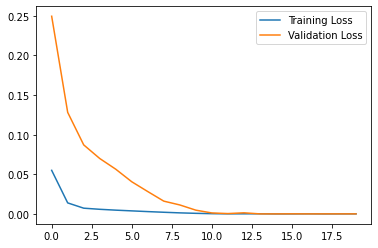

In [17]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

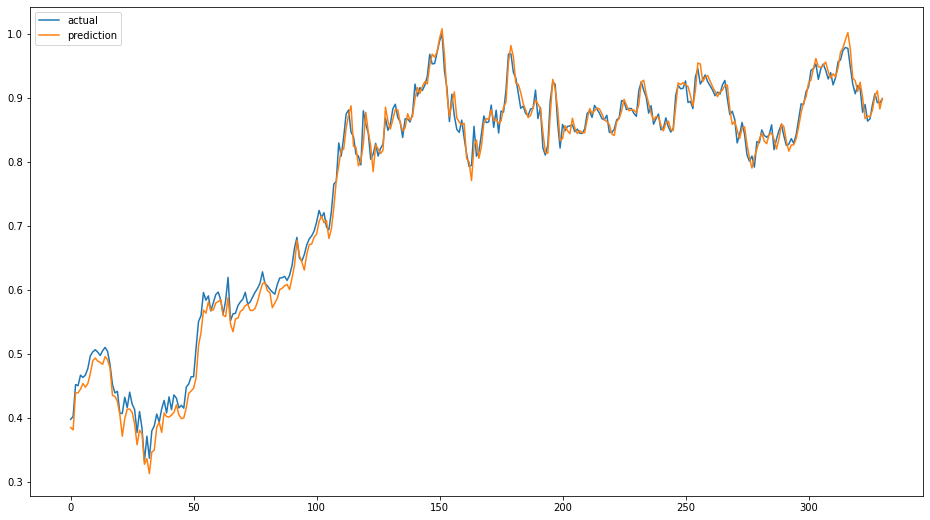

In [18]:
plt.figure(figsize=(16, 9))
plt.plot(np.asarray(y_test), label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()